# Introduction
This is a walkthrough of a project completed on a algae dataset. The aim was to provide statistical analysis insight, using r, on the effects of Nitrate, Phosphorus, Potassium , Silicate, and Sodium, as well as other parameters such as temperature, on chlorophyll concentration in three different environments: Natural Lakes, Reservoirs, and Rivers.

In [1]:
# Importing the data
Algae <- read.csv("AlgaeData.csv")

In [2]:
#First few enteries of the dataset
head(Algae)

Log_Chl_a,Type,Temp,Nitrate,Phosphate,Potassium,Silicate,Sodium
0.96,Reservoir,19.5,24.3,0.0183,2.87,13.7,9.7
0.81,Natural Lake,16.2,22.6,0.0182,2.56,20.9,11.4
0.12,River,16.0,24.0,0.0167,2.65,10.5,6.0
0.15,Natural Lake,17.5,23.6,0.0138,2.72,16.7,11.7
0.50,River,15.1,22.2,0.0150,2.18,12.5,9.6
0.03,Natural Lake,17.6,22.0,0.0174,2.86,11.8,10.9


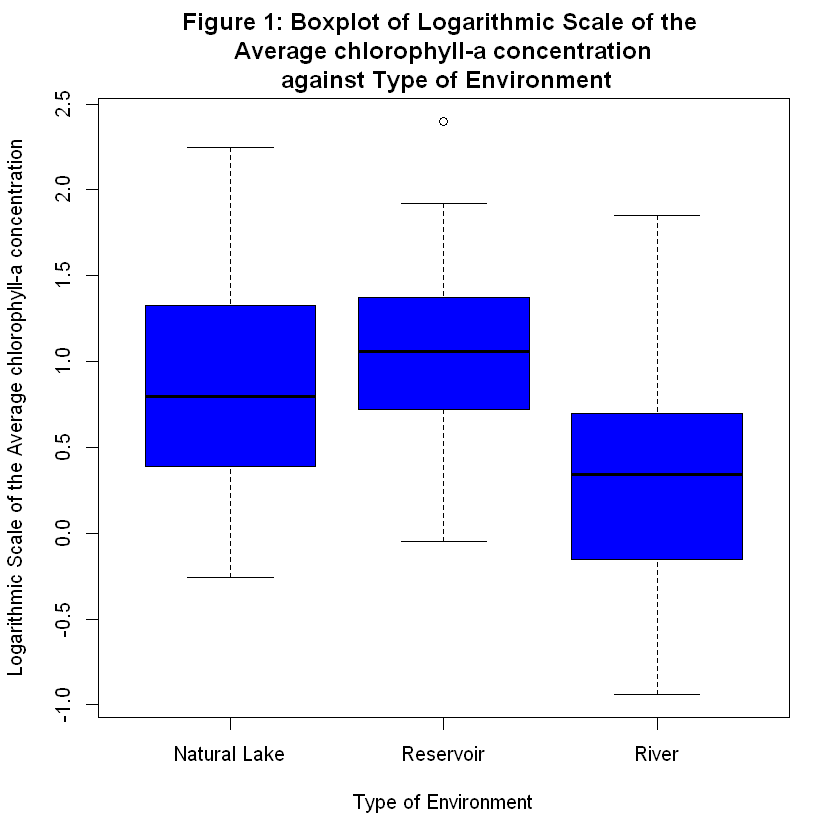

In [3]:
#Box plot of the Average chlorophyll-a concentration on logarithmic scale for June–August against the environment type
par( mfrow=c(1,1) )
boxplot(Log_Chl_a ~ Type, data = Algae, xlab = "Type of Environment", ylab = "Logarithmic Scale of the Average chlorophyll-a concentration", col = "4", main = "Figure 1: Boxplot of Logarithmic Scale of the \n Average chlorophyll-a concentration \n against Type of Environment")


This code creates a box plot using the boxplot() function to visualize the relationship between the "Log_Chl_a" variable and the "Type" variable from the "Algae" dataset. It sets various plot labels and titles.

In [4]:
Algae_River = Algae[ Algae$Type=="River", ]
Algae_Reservoir = Algae[ Algae$Type == "Reservoir", ]
Algae_Natural_Lake = Algae[ Algae$Type == "Natural Lake", ]

These lines of code subset the "Algae" dataset into three separate datasets: "Algae_River," "Algae_Reservoir," and "Algae_Natural_Lake," based on the values in the "Type" column.

In [5]:
summary(Algae_River$Log_Chl_a)
summary(Algae_Reservoir$Log_Chl_a)
summary(Algae_Natural_Lake$Log_Chl_a)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.9400 -0.1450  0.3400  0.3345  0.6975  1.8500 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -0.050   0.720   1.060   1.036   1.375   2.400 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.2600  0.3950  0.7950  0.8836  1.3300  2.2500 

These lines provide summary statistics (mean, median, quartiles, etc.) for the "Log_Chl_a" variable within each of the previously created datasets.

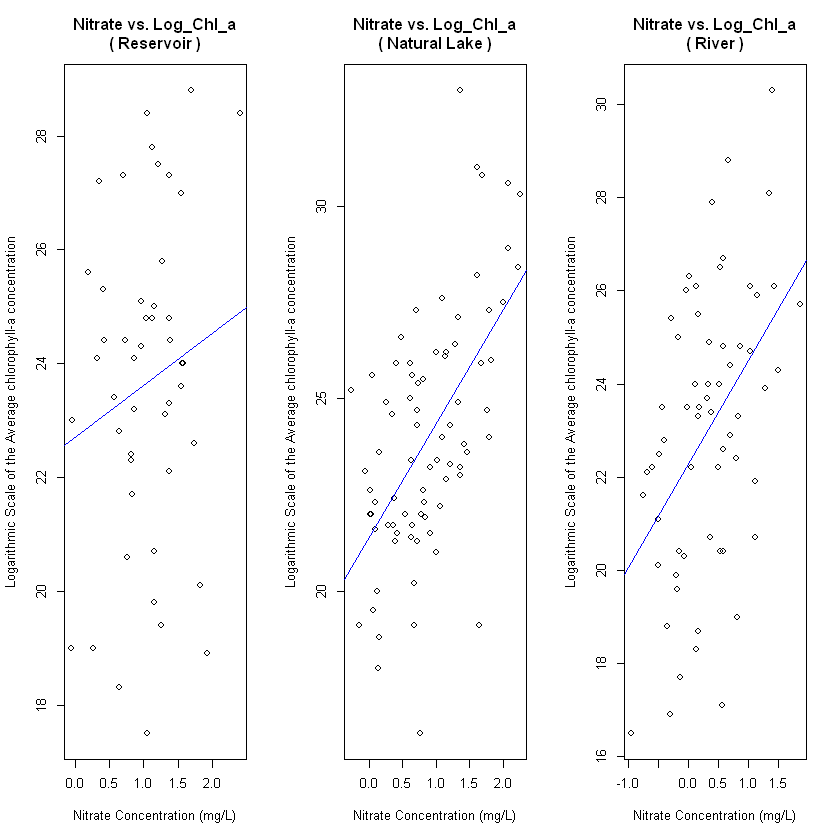

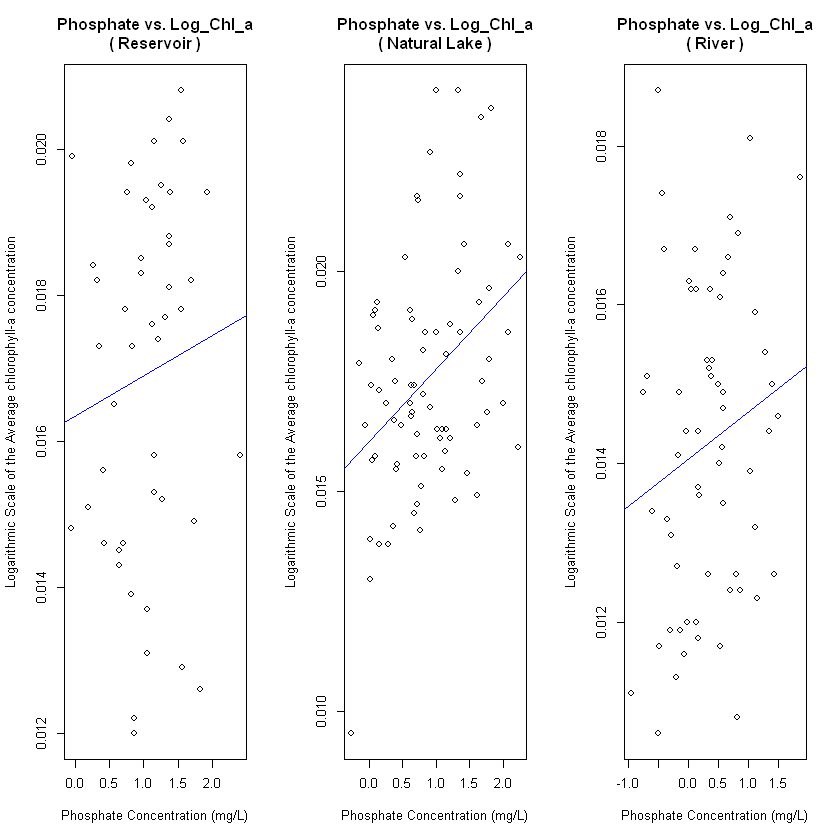

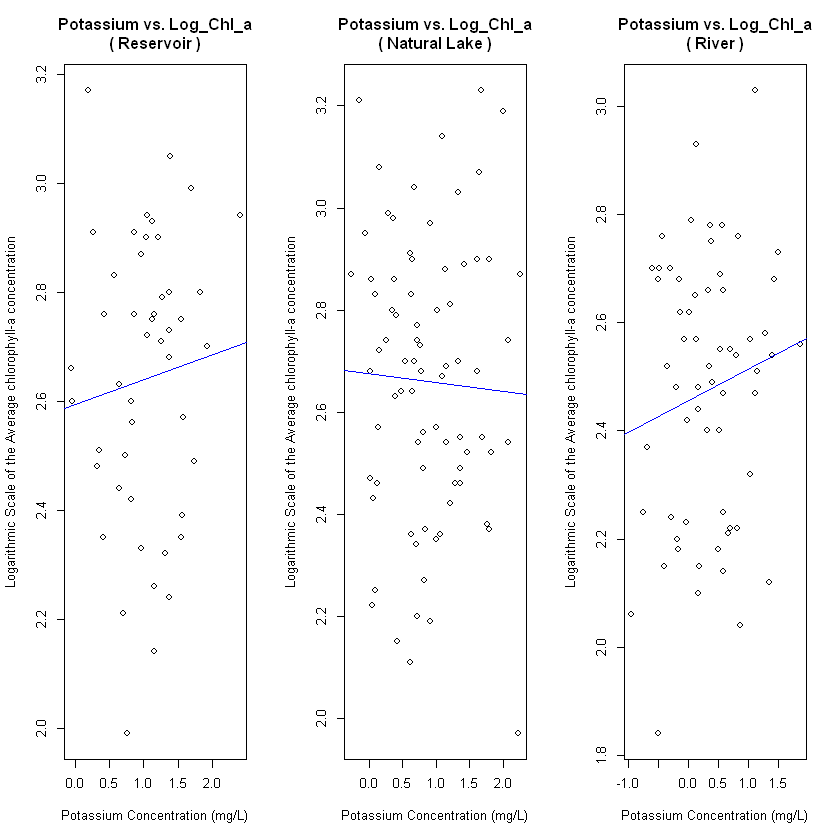

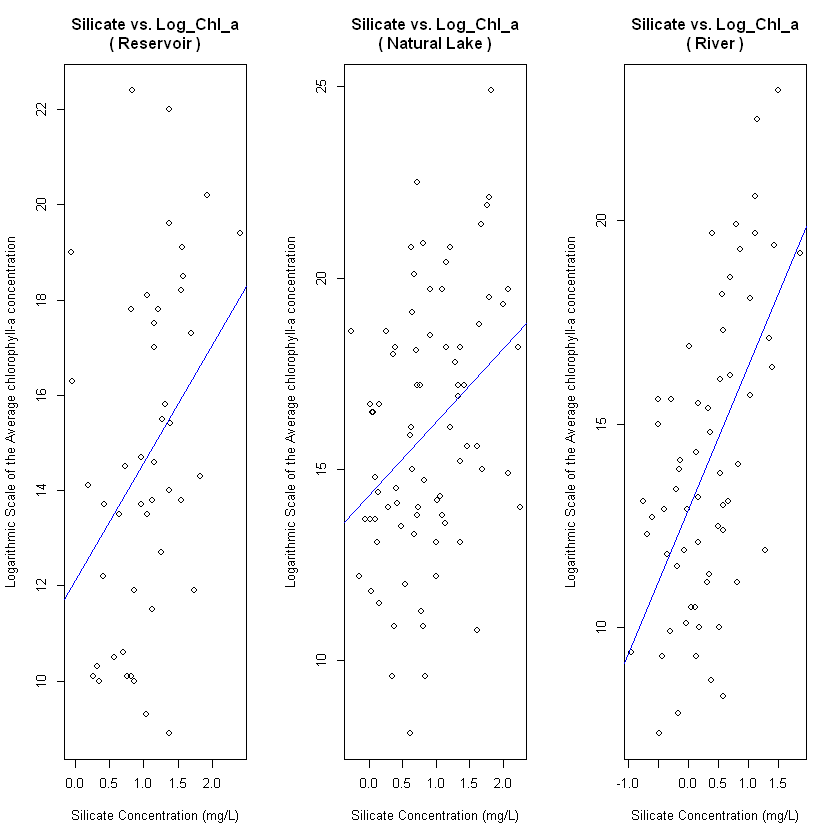

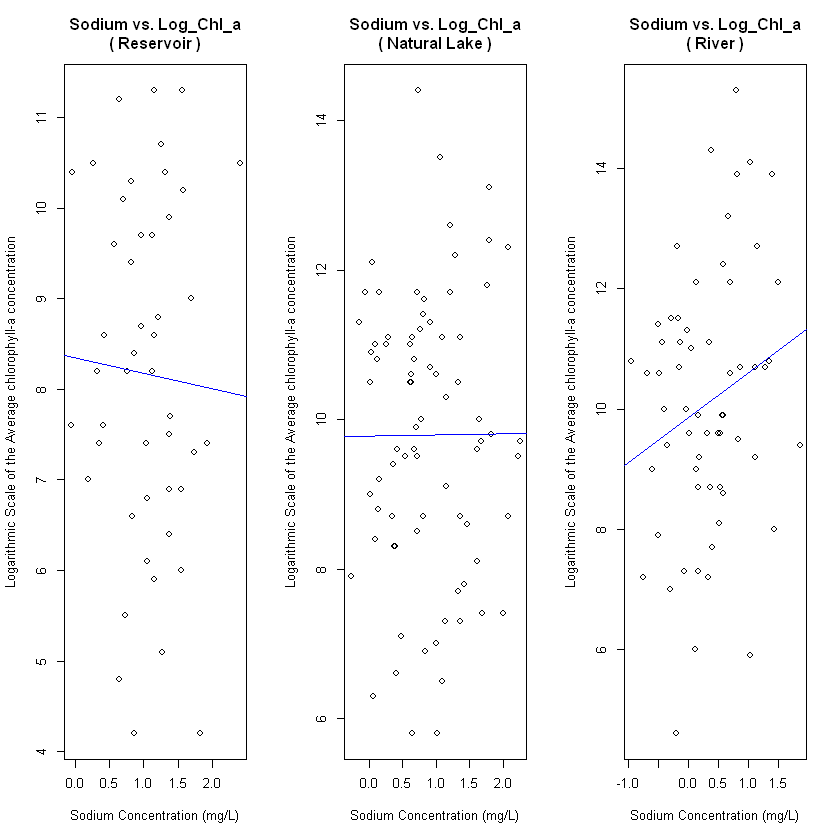

In [6]:
# Define a function for creating the plots and regression lines
createPlot <- function(x_var, y_var, xlab, ylab, main) {
  par(mfrow = c(1, 3))
  
  for (env_type in unique(Algae$Type)) {
    subset_data <- Algae[Algae$Type == env_type, ]
    
    plot(subset_data[[x_var]] ~ subset_data[[y_var]], 
         xlab = xlab, ylab = ylab, main = gsub(" \\(", "\n(", paste(main, "(", env_type, ")")))
    
    abline(lm(subset_data[[x_var]] ~ subset_data[[y_var]], data = subset_data), col = "blue")
  }
  
  par(mfrow = c(1, 1))
}

# Call the function for different chemical variables and environments
createPlot("Nitrate", "Log_Chl_a", "Nitrate Concentration (mg/L)", "Logarithmic Scale of the Average chlorophyll-a concentration", "Nitrate vs. Log_Chl_a")
createPlot("Phosphate", "Log_Chl_a", "Phosphate Concentration (mg/L)", "Logarithmic Scale of the Average chlorophyll-a concentration", "Phosphate vs. Log_Chl_a")
createPlot("Potassium", "Log_Chl_a", "Potassium Concentration (mg/L)", "Logarithmic Scale of the Average chlorophyll-a concentration", "Potassium vs. Log_Chl_a")
createPlot("Silicate", "Log_Chl_a", "Silicate Concentration (mg/L)", "Logarithmic Scale of the Average chlorophyll-a concentration", "Silicate vs. Log_Chl_a")
createPlot("Sodium", "Log_Chl_a", "Sodium Concentration (mg/L)", "Logarithmic Scale of the Average chlorophyll-a concentration", "Sodium vs. Log_Chl_a")


The code produces a series of plots showing the relationship between an element and the log of chlorophyll concnetration in respective environments

In [7]:
calculateCorrelations <- function(data, chemicals) {
  environments <- unique(data$Type)
  
  for (env in environments) {
    cat("Environment:", env, "\n")
    subset_data <- data[data$Type == env, ]
    
    for (col_name in colnames(chemicals)) {
      correlation <- cor(subset_data$Log_Chl_a, subset_data[[col_name]])
      cat(col_name, "Correlation:", correlation, "\n")
    }
    
    cat("\n")
  }
}


calculateCorrelations(Algae, Algae_Natural_Lake[, c("Nitrate", "Phosphate", "Potassium", "Silicate", "Sodium")])


Environment: Reservoir 
Nitrate Correlation: 0.1646932 
Phosphate Correlation: 0.1169059 
Potassium Correlation: 0.09110503 
Silicate Correlation: 0.3662982 
Sodium Correlation: -0.04592058 

Environment: Natural Lake 
Nitrate Correlation: 0.5786576 
Phosphate Correlation: 0.3781542 
Potassium Correlation: -0.03772728 
Silicate Correlation: 0.3500312 
Sodium Correlation: 0.005207025 

Environment: River 
Nitrate Correlation: 0.459997 
Phosphate Correlation: 0.1870064 
Potassium Correlation: 0.1495737 
Silicate Correlation: 0.5930162 
Sodium Correlation: 0.2170146 



Pearson Correlation Coefficients for each element in each environment based off of chlorophyl concentration. It should be noted that potassium has a weak correlation in all environment types. 

In [8]:
calculateCorrelation <- function(x, y, label) {
  correlation <- cor(x, y, use = "pairwise.complete.obs")
  cat("Correlation between", label, ":", correlation, "\n")
  return(correlation)
}

# Example usage:
correlation_Natural_Lake <- calculateCorrelation(Algae_Natural_Lake$Log_Chl_a, Algae_Natural_Lake$Temp, "Log_Chl_a and Temperature in Natural_Lake")
correlation_Reservoir <- calculateCorrelation(Algae_Reservoir$Log_Chl_a, Algae_Reservoir$Temp, "Log_Chl_a and Temperature in Reservoir")
correlation_River <- calculateCorrelation(Algae_River$Log_Chl_a, Algae_River$Temp, "Log_Chl_a and Temperature in River")


Correlation between Log_Chl_a and Temperature in Natural_Lake : 0.1896202 
Correlation between Log_Chl_a and Temperature in Reservoir : 0.1677136 
Correlation between Log_Chl_a and Temperature in River : 0.4611668 


In [9]:
# Define a function for linear regression and summary
performLinearRegression <- function(data, formula_str) {
  formula <- as.formula(formula_str)
  model <- lm(formula, data = data)
  return(summary(model))
}

# Example usage:
Algae$Type <- as.factor(Algae$Type)

# Linear regression and summaries for each variable of interest
variables_of_interest <- c("Nitrate", "Phosphate", "Potassium", "Silicate", "Sodium")

for (var in variables_of_interest) {
  cat("Linear Regression for", var, ":\n")
  formula_str <- paste("Log_Chl_a ~", var)
  summary_result <- performLinearRegression(Algae, formula_str)
  print(summary_result)
  cat("\n")
}

# Linear regression without Sodium and final summary
cat("Linear Regression with all:\n")
formula_combined <- "Log_Chl_a ~ Nitrate + Phosphate + Potassium + Silicate + Sodium"
summary_combined <- performLinearRegression(Algae, formula_combined)
print(summary_combined)
cat("\n")

# Linear regression without Sodium and final summary
cat("Linear Regression without Sodium:\n")
formula_combined <- "Log_Chl_a ~ Nitrate + Phosphate + Potassium + Silicate"
summary_combined <- performLinearRegression(Algae, formula_combined)
print(summary_combined)


Linear Regression for Nitrate :

Call:
lm(formula = formula, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.29562 -0.45611  0.00039  0.43048  1.63941 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.57463    0.33583  -4.689 5.32e-06 ***
Nitrate      0.09816    0.01412   6.950 6.05e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.593 on 185 degrees of freedom
Multiple R-squared:  0.207,	Adjusted R-squared:  0.2028 
F-statistic:  48.3 on 1 and 185 DF,  p-value: 6.049e-11


Linear Regression for Phosphate :

Call:
lm(formula = formula, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47168 -0.41678 -0.00614  0.40995  1.70908 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.8388     0.2598  -3.228  0.00147 ** 
Phosphate    96.8165    15.7012   6.166 4.29e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '

Linear Regression Model considering different parameters. Chlorophyll concnetration is considered with respect to each element individually as well as being considered against all elements, and finally against all elements except Sodium.

The average chlorophyll-a concnetration increases with increasing concentration of chemicals with phosphate having the biggest increase and nitrate, phosphate and silicate being significant at the 5% level.

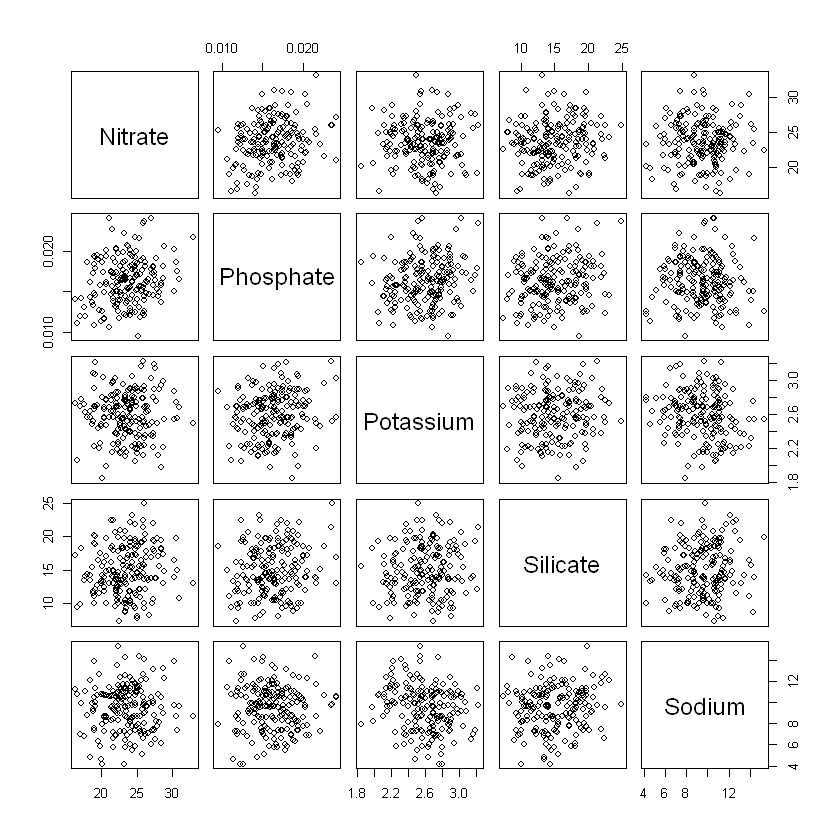

In [10]:
pairs(Algae[,4:8])

Colinearity Pairs Plot 

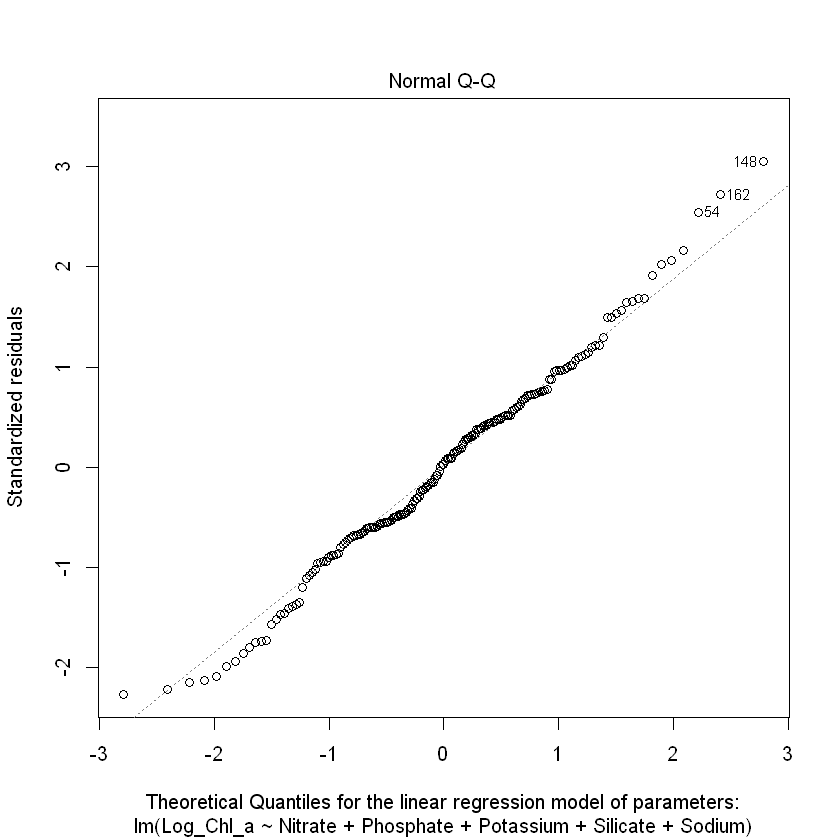

In [11]:
estim = lm( Log_Chl_a ~ Nitrate + Phosphate + Potassium + Silicate + Sodium, data=Algae )
par( mfrow=c(1,1))
plot( estim, which =2, xlab = "Theoretical Quantiles for the linear regression model of parameters:") 



Points lie close to the line suggesting normality is a reasonable assumption


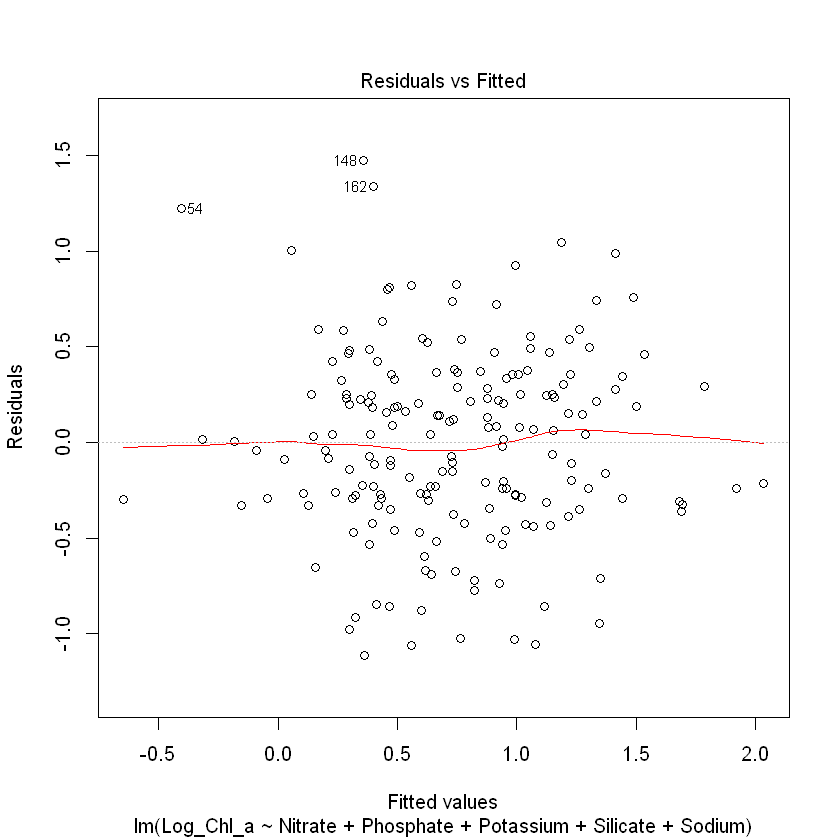

In [12]:
plot( estim, which = 1)


Residuals have constant variance and that linearity is a reasonable assumption

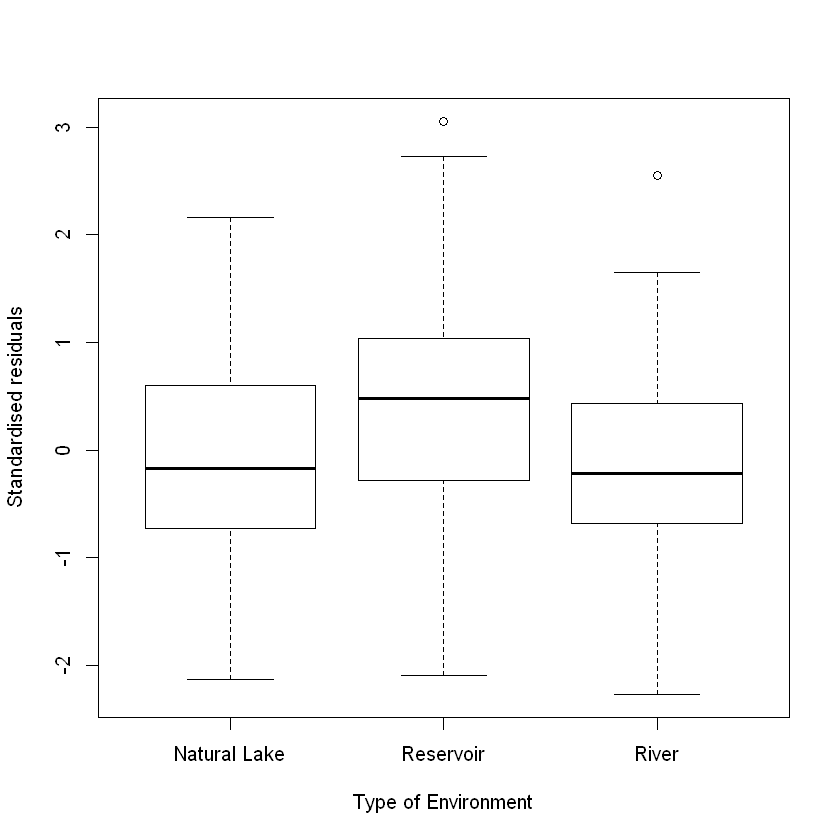

In [13]:
plot(Algae$Type, rstandard(estim), xlab = "Type of Environment", ylab = "Standardised residuals")

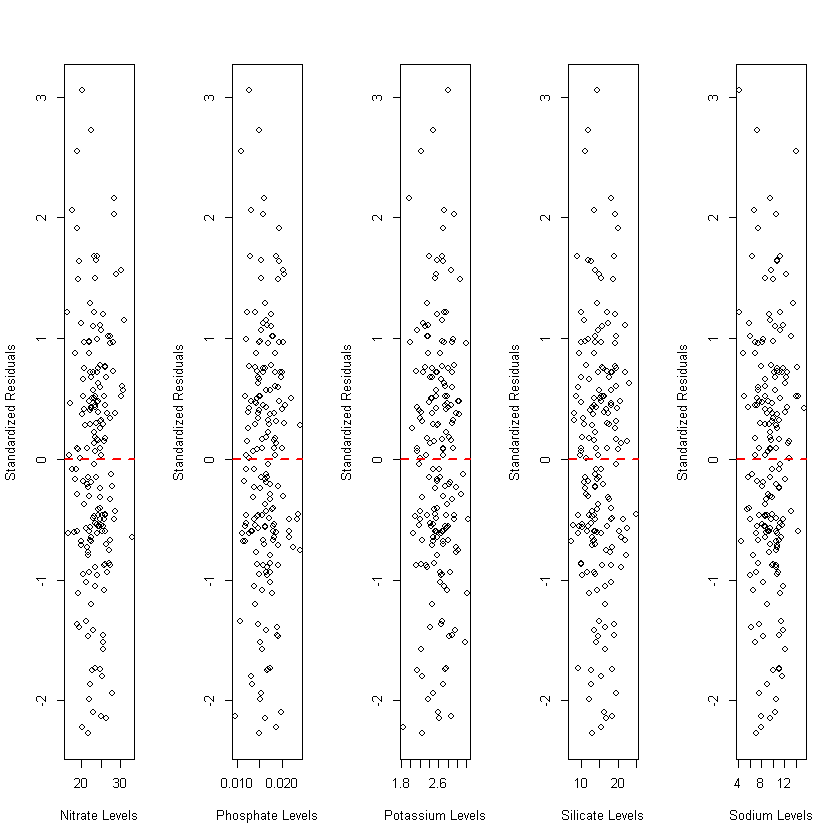

In [14]:
par( mfrow=c(1,5) )
plot( Algae$Nitrate, rstandard(estim),
      xlab="Nitrate Levels", ylab="Standardized Residuals" )
abline( h=0, lty=2, lwd=2, col=2 )
plot( Algae$Phosphate, rstandard(estim),
      xlab="Phosphate Levels", ylab="Standardized Residuals" )
abline( h=0, lty=2, lwd=2, col=2 )
plot( Algae$Potassium, rstandard(estim),
      xlab="Potassium Levels", ylab="Standardized Residuals" )
abline( h=0, lty=2, lwd=2, col=2 )
plot( Algae$Silicate, rstandard(estim),
      xlab="Silicate Levels", ylab="Standardized Residuals" )
abline( h=0, lty=2, lwd=2, col=2 )
plot( Algae$Sodium, rstandard(estim),
      xlab="Sodium Levels", ylab="Standardized Residuals" )
abline( h=0, lty=2, lwd=2, col=2 )

All 5 graphs appear ranfomly scattered. Therefore we can conclude that all assumptions for the multiple linear regression model are reasonable.

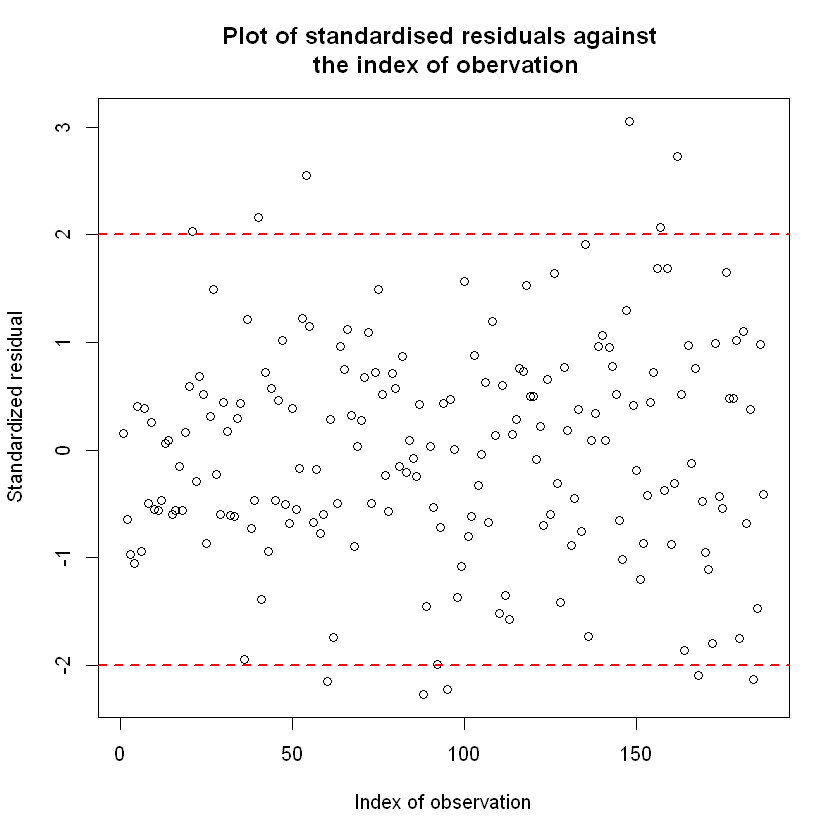

In [15]:
plot( rstandard(estim) , xlab="Index of observation", 
      ylab="Standardized residual", main = "Plot of standardised residuals against \n the index of obervation")
abline( h=-2, lty=2, lwd=2, col=2 )
abline( h=2, lty=2, lwd=2, col=2 )

There are possibly 8-9 outliers that we want to investigate further 

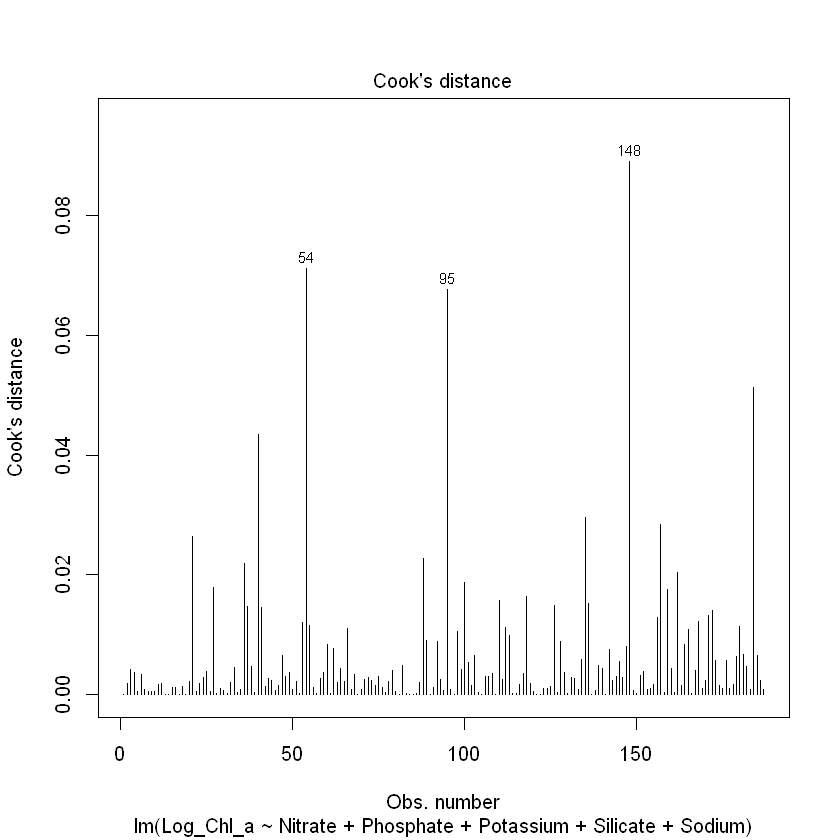

In [16]:
par( mfrow=c(1,1) )
plot( estim, which=4 )

The Cooke's distance for all observations is small so we can conclude that none of the outliers had an unduly large influence on the model estimates.

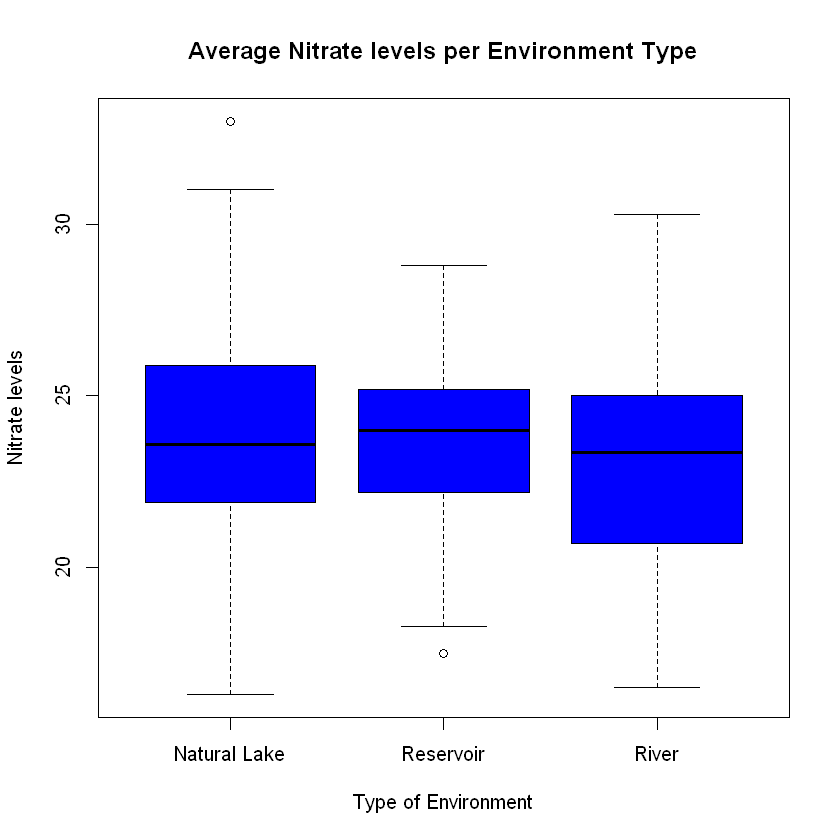

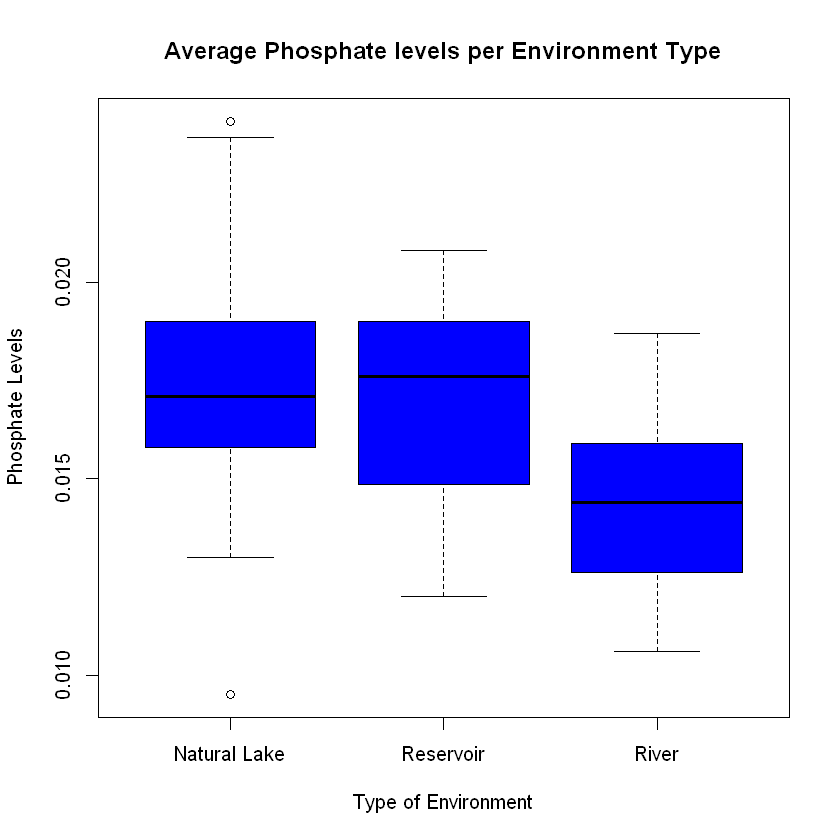

In [17]:
boxplot(Algae$Nitrate ~ Algae$Type, data =  Algae, xlab = "Type of Environment", ylab = "Nitrate levels", main = "Average Nitrate levels per Environment Type",col = 4)
boxplot(Algae$Phosphate ~ Algae$Type, data =  Algae, xlab = "Type of Environment", ylab = "Phosphate Levels", main = "Average Phosphate levels per Environment Type", col = 4)


In [18]:
summary( Algae_Natural_Lake$Nitrate)
summary( Algae_River$Nitrate)

summary( Algae_Natural_Lake$Phosphate)
summary( Algae_River$Phosphate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.30   21.93   23.60   23.99   25.90   33.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.50   20.70   23.35   23.01   24.98   30.30 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00950 0.01582 0.01710 0.01757 0.01897 0.02410 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01060 0.01260 0.01440 0.01425 0.01578 0.01870 

In [19]:
t.test( x=Algae_Natural_Lake$Nitrate, y=Algae_River$Nitrate, var.equal = F)


	Welch Two Sample t-test

data:  Algae_Natural_Lake$Nitrate and Algae_River$Nitrate
t = 1.8698, df = 133.69, p-value = 0.0637
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05706426  2.03134052
sample estimates:
mean of x mean of y 
 23.99359  23.00645 


There is no statistically significant difference in Nitrate concentrations between the "Algae_Natural_Lake" and "Algae_River" groups. The p-value is greater than the typical significance level of 0.05, and the confidence interval includes zero, indicating that we fail to reject the null hypothesis. This suggests that, on average, there is no strong evidence to conclude that the two groups have different mean Nitrate concentrations.

In [20]:
t.test( x=Algae_Natural_Lake$Phosphate, y=Algae_River$Phosphate, var.equal = F)


	Welch Two Sample t-test

data:  Algae_Natural_Lake$Phosphate and Algae_River$Phosphate
t = 8.3563, df = 137.2, p-value = 6.39e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.002534249 0.004105453
sample estimates:
 mean of x  mean of y 
0.01757308 0.01425323 


There is a highly statistically significant difference in Phosphate concentrations between the "Algae_Natural_Lake" and "Algae_River" groups. The extremely low p-value indicates strong evidence that the means of the two groups are not equal. Additionally, the confidence interval does not include zero, further supporting the presence of a significant difference. On average, "Algae_Natural_Lake" has a higher mean Phosphate concentration compared to "Algae_River."

In [21]:
shapiro.test(Algae_Natural_Lake$Nitrate)
shapiro.test((Algae_River$Nitrate))

shapiro.test(Algae_Natural_Lake$Phosphate)
shapiro.test(Algae_River$Phosphate)


	Shapiro-Wilk normality test

data:  Algae_Natural_Lake$Nitrate
W = 0.98431, p-value = 0.4538



	Shapiro-Wilk normality test

data:  (Algae_River$Nitrate)
W = 0.98835, p-value = 0.8238



	Shapiro-Wilk normality test

data:  Algae_Natural_Lake$Phosphate
W = 0.96707, p-value = 0.04104



	Shapiro-Wilk normality test

data:  Algae_River$Phosphate
W = 0.97719, p-value = 0.301


For Nitrate concentrations in both "Algae_Natural_Lake" and "Algae_River," there is no strong evidence to suggest a departure from normality, as indicated by high p-values.

For Phosphate concentrations in "Algae_Natural_Lake," there is some evidence to suggest that the data may not follow a normal distribution, as indicated by the relatively low p-value. Further analysis or transformations may be needed if normality is an assumption for subsequent analyses.

For Phosphate concentrations in "Algae_River," there is no strong evidence to suggest a departure from normality, as indicated by a high p-value.

In [22]:
library(car)
leveneTest(Nitrate ~ Type, data = Algae)
leveneTest(Phosphate ~ Type, data = Algae)

Loading required package: carData


,Df,F value,Pr(>F)
group,2,0.2525077,0.7771189
,184,NA,NA


,Df,F value,Pr(>F)
group,2,1.482988,0.2296583
,184,NA,NA


Levene's test is used to assess whether the variances of different groups or categories (in this case, defined by the "Type" variable) are significantly different from each other. It's commonly used to test the assumption of homogeneity of variances in ANOVA (analysis of variance) and regression analyses.

Here's an analysis of the output you provided for both Nitrate and Phosphate with respect to the code:

For Nitrate:

Df: Degrees of freedom. In this case, there are 2 groups (Natural_Lake, Reservoir, and River) and 184 observations.
F value: The test statistic for Levene's test. It measures the ratio of the between-group variance to the within-group variance.
Pr(>F): The p-value associated with the F statistic. It tells you the probability of obtaining an F statistic as extreme as the one observed, assuming that the variances are equal across groups.
Interpretation:

For Nitrate, the F value is approximately 0.2525, and the p-value is approximately 0.7771.
The null hypothesis of Levene's test is that the variances across groups are equal. In this case, the p-value (0.7771) is much greater than the typical significance level (e.g., 0.05). Therefore, you fail to reject the null hypothesis.
This result suggests that there is no significant difference in variances of Nitrate concentrations across the three types of environments (Natural_Lake, Reservoir, River).
For Phosphate:

Df: Degrees of freedom, as before.
F value: Test statistic for Levene's test.
Pr(>F): P-value for the test.
Interpretation:

For Phosphate, the F value is approximately 1.4830, and the p-value is approximately 0.2297.
Similar to the Nitrate test, the p-value for Phosphate (0.2297) is greater than the typical significance level. As a result, you fail to reject the null hypothesis.
This implies that there is no significant difference in variances of Phosphate concentrations across the three types of environments (Natural_Lake, Reservoir, River).
In both cases, the p-values are greater than the significance level (e.g., 0.05), indicating that there is no evidence to suggest that the variances of Nitrate and Phosphate concentrations differ significantly among the different types of environments. This suggests that the assumption of homogeneity of variances is met for these variables, which is often a prerequisite for certain statistical tests, such as ANOVA or linear regression.